In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [59]:
fig_store = "../MasterThesis/Thesis/figures/ModelsOfPeer/"

# Compare

PyMC

graders:time
20:14.8
40:31.1
100:80.7

MH

graders:time
100:8.941389

Gibbs

graders:time
100:3.834045

Extended Gibbs

graders:time
100:56.172505

In [ ]:
63.589409/489.620924

In [ ]:
489.620924/3

Cython

graders:time
20:1.441123
100:6.071004

Numpy

graders:time
10:34.483265
20:63.801284
25:78.431979
50:151.981305
100:299.384263

PyPy MH

graders:time
100:0.823724

PyPy Gibbs

graders:time
100:0.671064

PyPy Extended Gibbs

graders:time
100:2.654069

In [6]:
67.7/np.mean([15.913485,15.941484,16.028075])

4.2415849752576307

In [82]:
data = [('PG (PyMC)',[81.348777,105.167174,90.906841]),('PG',[12.587521,12.546737,14.825873]),('PG2',[4.982053,5.002404,5.779199]),('PG3',[16.067495,15.366610,16.392940])]

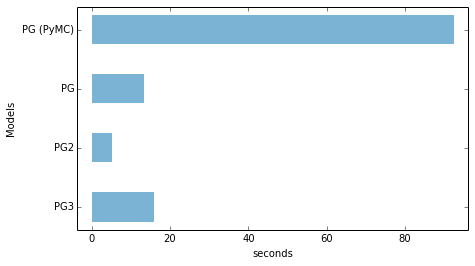

In [83]:
with PdfPages(fig_store + "ModelsSpeedCompare.pdf") as pdf:
    fig = plt.figure(figsize(7,4))
    labels = list()
    values = list()
    width = 0.5
    data.reverse()
    #data.sort(key=lambda x : x[1], reverse=True)
    for (l, v) in data:
        labels.append(l)
        values.append(np.mean(v))
    ind = np.arange(len(data)) 
    plt.barh(ind + width,values,height = width,alpha = 0.65, color = "#348ABD",linewidth=0)
    plt.yticks(ind + width*1.5, labels)
    plt.xlabel('seconds')
    plt.ylabel('Models')
    #plt.yscale('log', nonposy='clip')
    plt.margins(0.04)
    plt.show()
    pdf.savefig(fig,bbox_inches='tight')

In [99]:
np.mean([16.067495,15.366610,16.392940])

15.942348333333333

In [106]:
np.mean([12.587521,12.546737,14.825873])/np.mean([1.518236,1.068192,1.239747])

10.443884819695914

In [103]:
16.0/3.0

5.333333333333333

In [84]:
data = [('PG',[12.587521,12.546737,14.825873]),('PyPy PG',[1.518236,1.068192,1.239747]),
        ('PG2',[4.982053,5.002404,5.779199]),('PyPy PG2',[0.990086,1.029071,0.932515]),
        ('PG3',[16.067495,15.366610,16.392940]),('PyPy PG3',[2.800010,3.037414,2.698933])]
data.reverse()

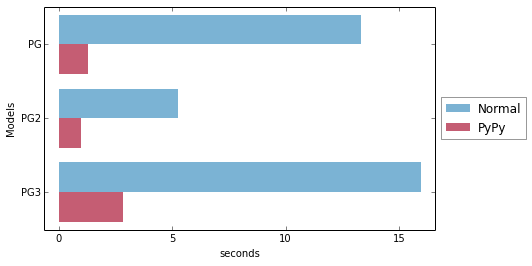

In [85]:
with PdfPages(fig_store + "PyPyCompareSpeed.pdf") as pdf:
    fig = plt.figure(figsize(7,4))
    ax = plt.subplot(111)
    labels = ['PG','PG2','PG3']
    labels.reverse()
    values_1 = list()
    values_2 = list()
    width = 0.4
    for i, (l, v) in enumerate(data):
        if i % 2 == 0:
            values_1.append(np.mean(v))
        else:
            values_2.append(np.mean(v))
    ind = np.arange(len(data)/ 2)
    plt.barh(ind + width*1.5,values_2,height = width,alpha = 0.65, color = "#348ABD",label="Normal",linewidth=0)
    plt.barh(ind + width*0.5,values_1,height = width,alpha = 0.65, color = "#A60628",label="PyPy",linewidth=0)
    ind = np.arange(len(data))  
    plt.yticks(ind + width*1.5, labels)
    plt.xlabel('seconds')
    plt.ylabel('Models')
    leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    leg.get_frame().set_alpha(0.4)
    plt.margins(0.04)
    plt.show()
    pdf.savefig(fig,bbox_inches='tight')

In [87]:
data = {
        "PG3":
            {'Q':[np.mean([16.067495,15.366610,16.392940]),np.mean([31.303986,28.953611,29.376719]),np.mean([58.753020,58.227501,58.802274])],
             'G':[np.mean([16.067495,15.366610,16.392940]),np.mean([32.034446,33.339596,32.496692]),np.mean([70.163531,69.185442,75.887381])],
             'Gpg':[np.mean([16.067495,15.366610,16.392940]),np.mean([24.656760,24.175149,22.813231]),np.mean([39.112722,42.962989,37.401617])]
            },
        "PG2": 
            {'Q':[np.mean([4.982053,5.002404,5.779199]),np.mean([5.299793,5.200183,5.112771]),np.mean([5.224621,5.239218,5.501246])],
             'G':[np.mean([4.982053,5.002404,5.779199]),np.mean([10.746278,11.836767,11.513854]),np.mean([24.933894,24.002280,25.334897])],
             'Gpg':[np.mean([4.982053,5.002404,5.779199]),np.mean([8.178859,8.445457,7.694985]),np.mean([15.112323,14.321125,14.330069])]
            },

        "PG":
            {'Q':[np.mean([12.587521,12.546737,14.825873]),np.mean([13.040025,12.631606,12.643459]),np.mean([12.746460,12.960794,13.950898])],
             'G':[np.mean([12.587521,12.546737,14.825873]),np.mean([25.297337,29.791005,26.645623]),np.mean([59.032714,63.351558,57.799013])],
             'Gpg':[np.mean([12.587521,12.546737,14.825873]),np.mean([23.635634,20.938292,21.420687]),np.mean([37.347379,36.839569,36.694903])]
            }
       }

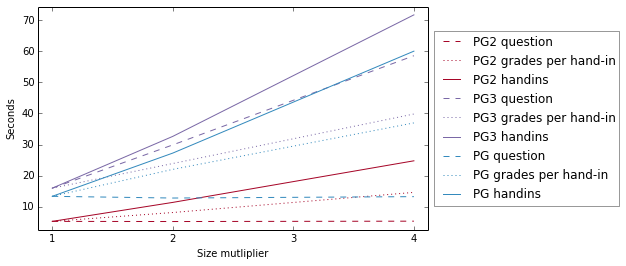

In [111]:
with PdfPages(fig_store + "CompareSpeedScaling.pdf") as pdf:
    fig = plt.figure(figsize(7,4))

    ax = plt.subplot(111)
    color_map = {"PG":"#348ABD", "PG2":"#A60628","PG3":"#7A68A6"}
    line_type_map = {"Q":"--", "G":"-","Gpg":":"}
    label_map = {"Q":"question", "G":"handins","Gpg":"grades per hand-in"}
    xindex = [1,2,4]
    for model, data_timings in data.iteritems():
        for parameter, data_ in data_timings.iteritems():
            text = model + " " + label_map[parameter]
            plt.plot(xindex,data_,color=color_map[model],linestyle=line_type_map[parameter],
                    label=text)
    plt.xlabel('Size mutliplier')
    plt.ylabel('Seconds')
    # Put a legend to the right of the current axis
    leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    leg.get_frame().set_alpha(0.4)
    plt.xticks([1,2,3,4], [1,2,3,4])
    plt.margins(0.04)
    plt.show()
    pdf.savefig(fig,bbox_inches='tight')